## Support Vector Machines (SVM)

#### Maximum margin classification

- Support vector machine is a _extention_ of the **perceptron**.
- _Objective_: to maximize the **margin**; distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are the so-called **support vectors**.



In [10]:
# Load the dataset

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

iris = datasets.load_iris()

# Assign petal length and petal width to X matrix (150 samples)
X = iris.data[:, [2, 3]]

# Class labels
y = iris.target

# Split the dataset into separate training and test datasets.
from sklearn.cross_validation import train_test_split

# Split the X and y arrays into 30 percent test data, and 70 (45 samples) percent training data (105 samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Optimization - Feature scaling
from sklearn.preprocessing import StandardScaler

# Initlalize a new StandardScaler object, sc
sc = StandardScaler()

# Using the fit method, estimate the sample mean and standard deviation for each feature demension. 
sc.fit(X_train)

# Transform both training and test sets using the sample mean and standard deviations
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
# Plotting Function

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all the samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)
        
    # highlight the test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')
    

In [4]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)

svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

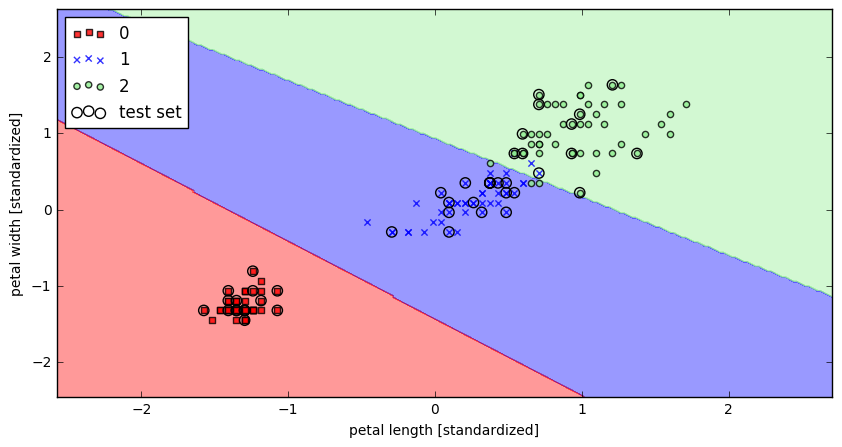

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

#### Solving nonlinear problems using a kernel SVM

- SVMs are easily kernelized to solve nonlinear classification problems. 
- One of the most widely used kernels is the **Radial Basis Function kernel (RBF)** or **Gaussian kernel**

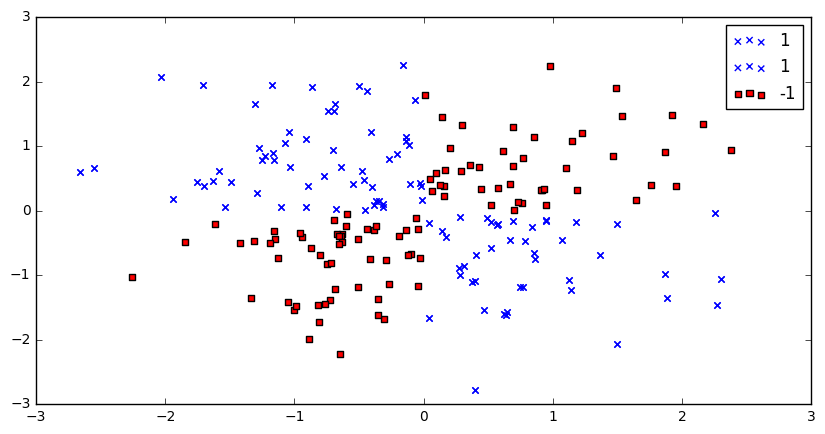

In [14]:
np.random.seed(0)

# Create a simple dataset that has a form of an XOR gate using the logical_xor function

X_xor = np.random.randn(200, 2)

# 100 samples assigned the class label 1
# 100 samples assigned the class label -1
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')

plt.ylim(-3.0)
plt.legend()
plt.show()

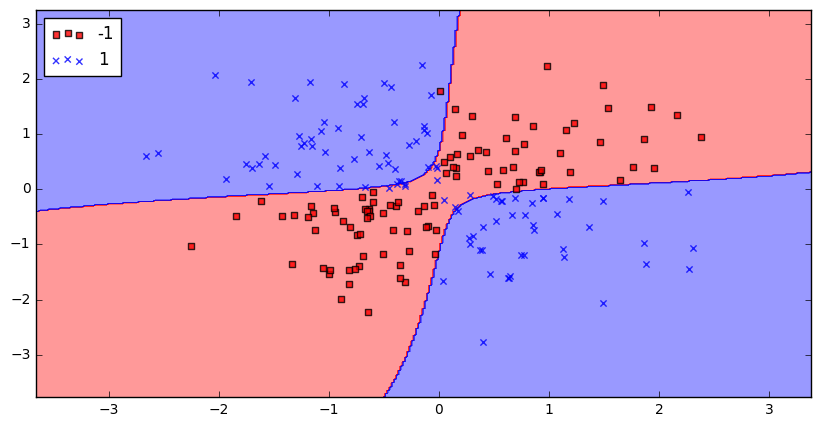

In [18]:
# Gamma ; 'cut-off' parameter for the Gaussian sphere.

svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

### Apply RBF kernel SVM using our Iris flower dataset.

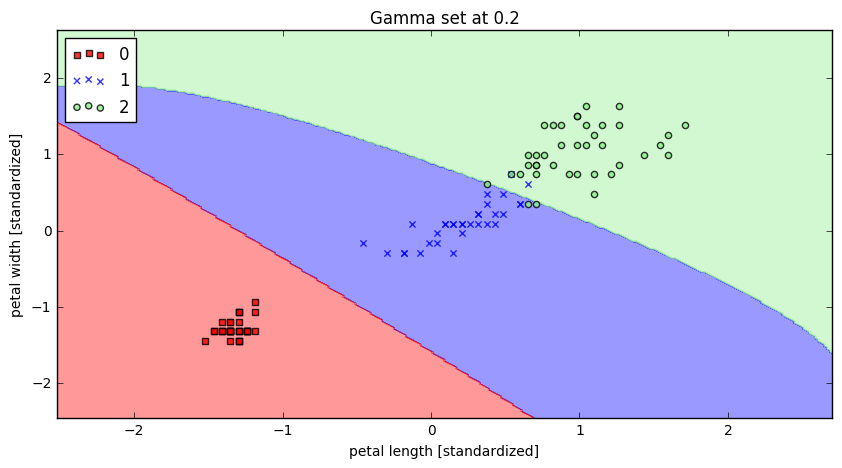

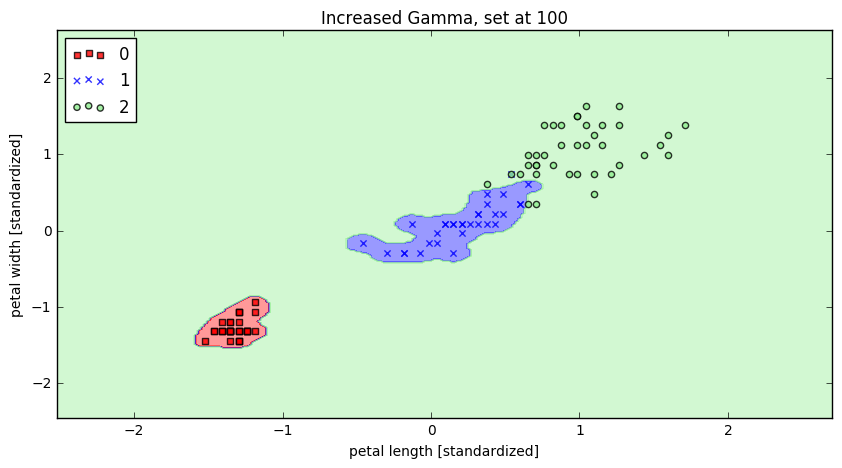

In [21]:
# Gamma ; 'cut-off' parameter for the Gaussian sphere.

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, y_train, classifier=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('Gamma set at 0.2')
plt.legend(loc='upper left')
plt.show()

# Gamma ; 'cut-off' parameter for the Gaussian sphere.

svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, y_train, classifier=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('Increased Gamma, set at 100')
plt.legend(loc='upper left')
plt.show()